# Exploratory data analysis (EDA): Waze Churn Prevention Project
**Background on the Waze Scenario:**

Waze's free navigation app simplifies travel for drivers worldwide. The collaborative effort of map editors, beta testers, translators, partners, and users ensures each journey is optimized for safety and efficiency. Collaborations with cities, transportation authorities, broadcasters, businesses, and first responders further Waze's commitment to facilitating safer and more efficient travel experiences.

In this project, **our primary objective** is to build a binomial logistic regression model and evaluate the model's performance.s to demostrate knowledge of exploratory data analysis (EDA) and a **binomial logistic regression model.**

The project employs a dataset titled 'waze_dataset.csv,' meticulously curated through a partnership between Google and Waze, containing synthetic data exclusively generated for this collaborative initiative.

**Key dataset specifications:**

* 14,999 rows – signifying unique user entries
* 12 columns, capturing essential data variables

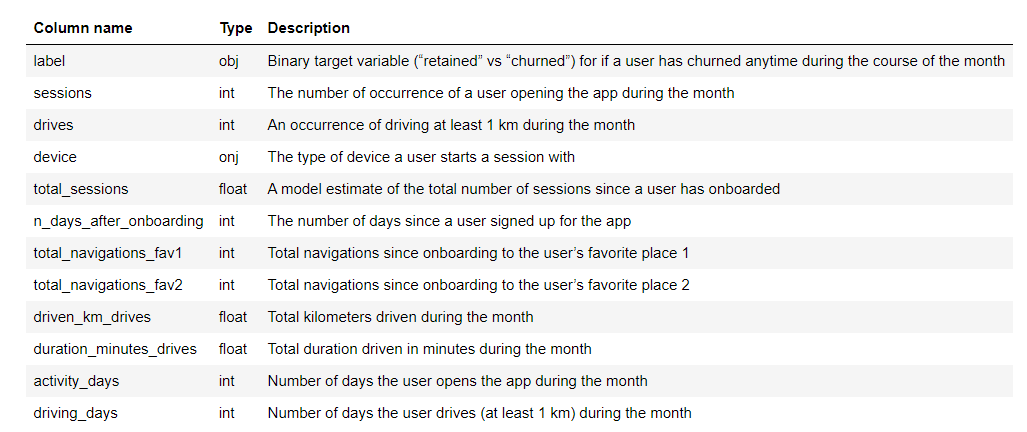

## Imports and data loading
Import the data and packages that are needed for building logistic regression models.

In [1]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

Read the data and store it as a dataframe object called df.

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

## Explore data with Exploratory data analysis (EDA):
Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


**we have roughly 700 values of missing data in the colum 'label'**

In [4]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


We'll use .drop() to remove the ID column since we don't need this information for the analysis.

In [5]:
df = df.drop('ID', axis=1)

Now, we'll check the class balance of the dependent (target) variable, **label.**

In [6]:
df['label'].value_counts(normalize = True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

Are there any variables that could potentially have outliers just by assessing at the quartile values, standard deviation, and max values?

To solve this question we'll use Call .describe() on the data.

In [7]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


The following columns: 
* sessions
* drives
* total sessions 
* total_navigations_fav1 
* total_navigations_fav2 
* driven_km_drives 
* duration_minutes_drives 

could have outliers. All of these columns have max values that are multiple standard deviations above the 75th percentile. This could indicate outliers in these variables. 	

## Create features
###  km_per_driving_day
We'll create a new column in df called km_per_driving_day, which represents the mean distance driven per driving day for each user.

In [8]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Note that some values are infinite. This is the result of there being values of zero in the driving_days column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.
We're going to convert these values from infinity to zero. 

In [9]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

### professional_driver
we'll create a new, binary feature called professional_driver that is a 1 for users who had 60 or more drives and drove on 15+ days in the last month.

In [10]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

Quick inspection of the new variable.

In [11]:
#Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

The churn rate for professional drivers is **7.6%**, while the churn rate for non-professionals is **19.9%**. This seems like it could add predictive signal to the model

### Preparing variables
To check the data type of the label variable and to verify if there are any missing values we use info() function

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int32  
dtypes: float64(4), int32(1

Because we know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the label column, and because these observations comprise less than 5% of the data, use the dropna() method to drop the rows that are missing this data.

In [13]:
# Drop rows with missing data in `label` column
df = df.dropna(subset=['label'])

####  Impute outliers
For this analysis, impute the outlying values for these columns. Calculate the 95th percentile of each column and change to this value any value in the column that exceeds it.

In [14]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

Check the result

In [15]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


#### Encode categorical variables
We'll change the data type of the label column to be binary. This change is needed to train a logistic regression model.

In [16]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


## Determine whether assumptions have been met

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this dataset.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

### Collinearity
We'll check the correlation among predictor variables

In [17]:
# Generate a correlation matrix
df.corr(method='pearson', numeric_only = True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


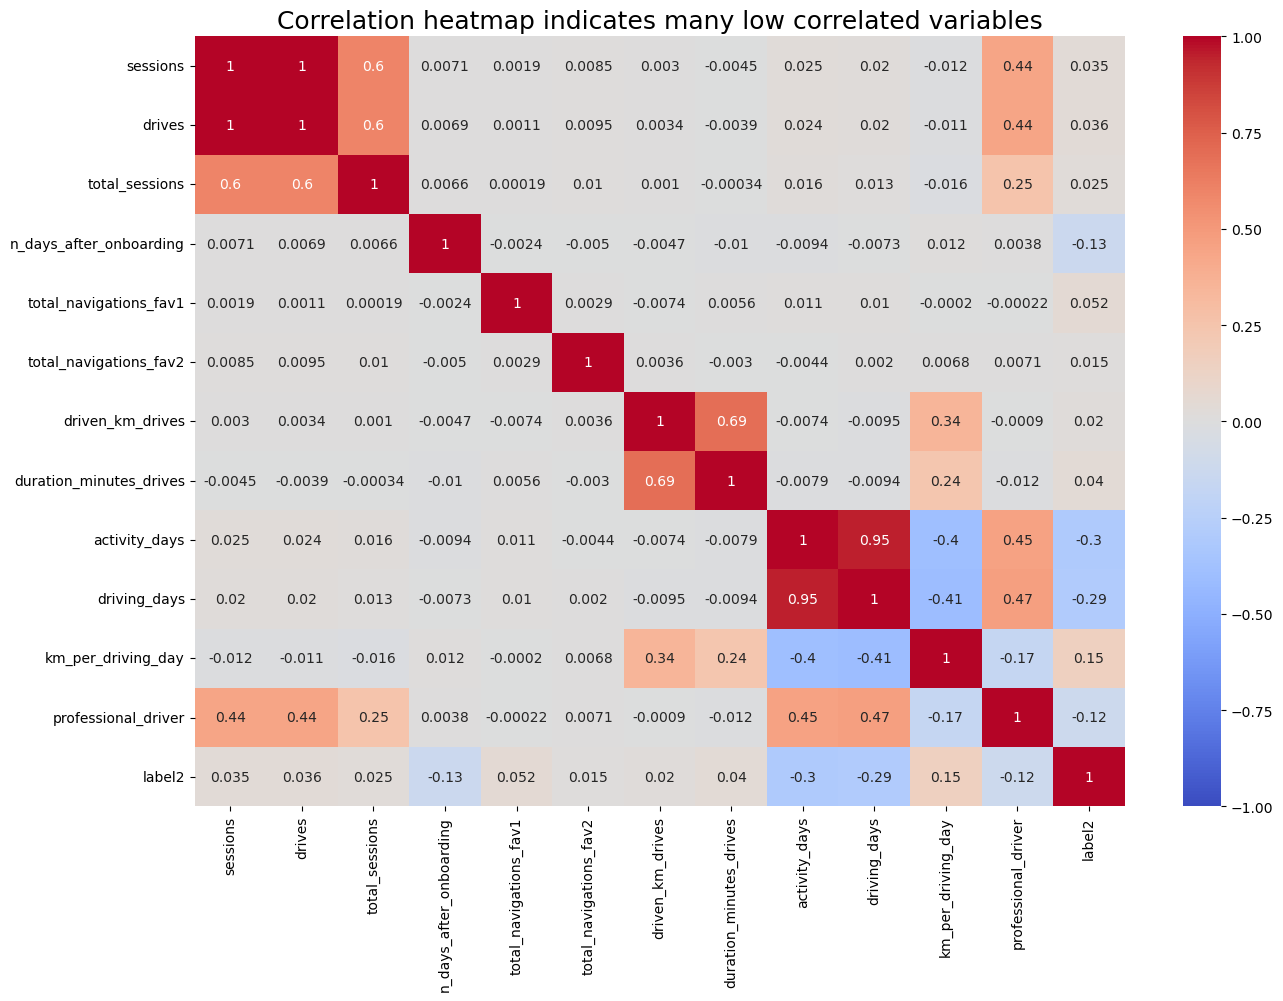

In [18]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson', numeric_only = True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

If there are predictor variables that have a Pearson correlation coefficient value greater than the absolute value of 0.7, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

The following variables are multicollinear with each other:
* sessions and drives: 1.0
* driving_days and activity_days: 0.95

###  Create dummies

We have selected device as an X variable, we will need to create dummy variables since this variable is categorical.

In [19]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


## Model building

### Assign predictor variables and target
To build our model you need to determine what X variables we want to include in your model to predict your **target—label2**
We'll drop the following variables and assign the results to X:

* label (this is the target)
* label2 (this is the target)
* device (this is the non-binary-encoded categorical variable)
* sessions (this had high multicollinearity)
* driving_days (this had high multicollinearity)

**Note:** Notice that sessions and driving_days were selected to be dropped, rather than drives and activity_days. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [20]:
# Isolate predictor variables
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])
X.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
0,200,296.748273,2276,208,0,2628.845068,1985.775061,28,138.360267,1,0
1,107,326.896596,1225,19,64,8898.716275,3160.472914,13,1246.901868,0,1
2,95,135.522926,2651,0,0,3059.148818,1610.735904,14,382.393602,0,0
3,40,67.589221,15,322,7,913.591123,587.196542,7,304.530374,0,1
4,68,168.247020,1562,166,5,3950.202008,1219.555924,27,219.455667,1,0


Now, we'll isolate the dependent (target) variable. Assign it to a variable called y.

In [21]:
# Isolate target variable
y = df['label2']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label2, dtype: int32

### Split the data
We've to use scikit-learn's train_test_split() function to perform a train/test split on our data using the X and y variables you assigned above

**Note 2:** Because the target class is imbalanced (82% retained vs. 18% churned), you want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's stratify parameter to y to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [22]:
#Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train.tail()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
13365,12,95.550956,801,250,4,2031.247401,1326.508435,4,1015.623701,0,0
8232,78,436.258238,2511,0,39,8227.304692,2512.499678,28,457.072483,1,0
1556,52,121.027899,28,12,0,7929.973718,4668.180092,28,417.367038,0,1
2893,12,134.824277,1855,73,55,8347.946528,2601.703172,13,1391.324421,0,1
13140,200,327.571613,2108,4,62,7334.950769,4581.545214,26,318.910903,1,1


We'll use scikit-learn to instantiate a logistic regression model. 

In [24]:
model = LogisticRegression(penalty='none', max_iter=400)
model.fit(X_train, y_train)

C:\Users\Juls\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=400, penalty='none')

We have to call the .coef_ attribute on the model to get the coefficients of each variable. The coefficients are in order of how the variables are listed in the dataset. The coefficients represent the change in the log odds of the target variable for every one unit increase in X.

In [25]:
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001913
total_sessions             0.000327
n_days_after_onboarding   -0.000406
total_navigations_fav1     0.001232
total_navigations_fav2     0.000931
driven_km_drives          -0.000015
duration_minutes_drives    0.000109
activity_days             -0.106032
km_per_driving_day         0.000018
professional_driver       -0.001529
device2                   -0.001041
dtype: float64

The model's intercept_ attribute to get the intercept of the model.

In [26]:
model.intercept_

array([-0.00170675])

###  Check final assumption
To verify the linear relationship between X and the estimated log odds  by making a regplot.

we have to call the model's predict_proba() method to generate the probability of response for each sample in the training data. Assign the result to a variable called training_probabilities. This results in a 2-D array where each row represents a user in X_train. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [27]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.93963482, 0.06036518],
       [0.61967306, 0.38032694],
       [0.76463185, 0.23536815],
       ...,
       [0.91909643, 0.08090357],
       [0.8509211 , 0.1490789 ],
       [0.93516295, 0.06483705]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where p is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. we'll create a dataframe called logit_data that is a copy of df.

2. We'll create a new column called logit in the logit_data dataframe. The data in this column should represent the logit for each user.

In [28]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

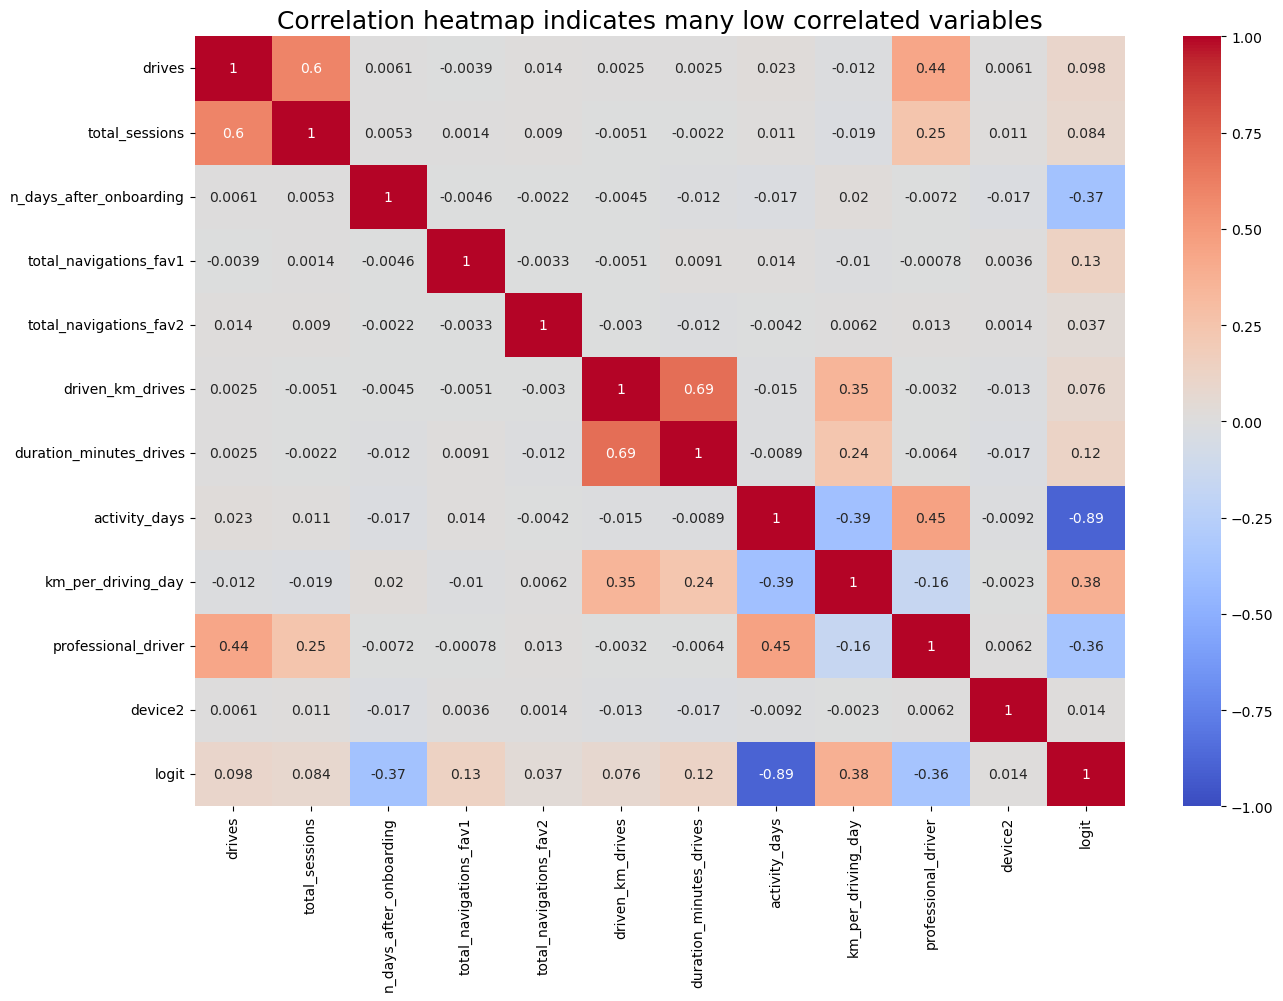

In [29]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(logit_data.corr(method='pearson', numeric_only = True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

## Results and evaluation
If the logistic assumptions are met, the model results can be appropriately interpreted.

We will use the code block below to make predictions on the test data.

In [33]:
# Generate predictions on X_test
y_preds = model.predict(X_test)

Now, we have to use the score() method on the model with X_test and y_test as its two arguments.

In [34]:
# Score the model (accuracy(default)) on the test data
model.score(X_test, y_test)

0.8237762237762237

### Show results with a confusion matrix

A confusion matrix is a table used to evaluate the performance of a machine learning algorithm. It shows how many samples were correctly or incorrectly classified by the algorithm in each class.

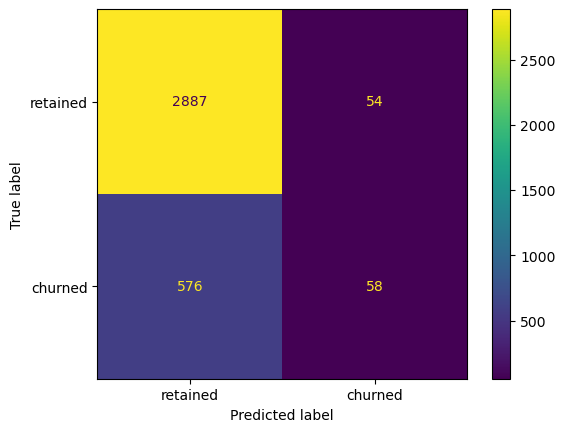

In [35]:
cm = confusion_matrix(y_test, y_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

We can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's classification_report() function to generate a table from y_test and y_preds.

In [36]:
# Calculate precision manually
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.5178571428571429

In [37]:
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.0914826498422713

In [38]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



## Conclusion
1. activity_days was by far the most important feature in the model. It had a negative correlation with user churn. This was not surprising, as this variable was very strongly correlated with driving_days, which was known from EDA to have a negative correlation with churn.
2. User churn rate increased as the values in km_per_driving_day increased. The correlation heatmap here in this notebook revealed this variable to have the strongest positive correlation with churn of any of the predictor variables by a relatively large margin. In the model, it was the second-least-important variable.
3. In a multiple logistic regression model, features can interact with each other and these interactions can result in seemingly counterintuitive relationships. This is both a strength and a weakness of predictive models, as capturing these interactions typically makes a model more predictive while at the same time making the model more difficult to explain.
4. In the case of this model, one of the engineered features (professional_driver) was the third-most-predictive predictor. It could also be helpful to scale the predictor variables, and/or to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features.